In [1]:
from helper_fns import *

In [2]:
import os,sys
from IPython.display import Image

In [3]:
cmap = ['#c3e2e3', '#7399b8','#424673', '#FFA500']
cmap_paired = [ '#c3e2e3', '#95c0ce', '#7399b8', '#59709c', '#424673', '#27213f']

In [4]:
dataset = 'airfoil'
threshold_type = 'absolute'

bias = 0
ntrial = 100

In [5]:
muh_fun_range = ['linear_regression','support_vector','knn','polynomial_regression']
models = ['Linear Regression','SVR','KNN', 'Polynomial Regression']
tau_range = [7,10]

cp_types = ['Jacknife+', 'CV+','Split', 'Empirical']

In [6]:
muh_fun = muh_fun_range[-1]
model = models[-1]
tau = tau_range[0]

In [7]:
filler = '/'
filler2 = '/tau_' + str(tau) + '/'

### Define variables and load in data

In [8]:
airfoil = pd.read_csv('0.Datasets/airfoil/airfoil.txt', sep = '\t', header=None)
airfoil.columns = ["Frequency","Angle","Chord","Velocity","Suction","Sound"]
X_airfoil = airfoil.iloc[:, 0:5].values
X_airfoil[:, 0] = np.log(X_airfoil[:, 0])
X_airfoil[:, 4] = np.log(X_airfoil[:, 4])
Y_airfoil = airfoil.iloc[:, 5].values
n_airfoil = len(Y_airfoil)

In [9]:
n_total = len(Y_airfoil)
n_train = int(0.7*n_total)
n_test = n_total - n_train

In [10]:
X_train, Y_train, X_test, Y_test = generate_data_for_trials(1, n_train, n_total, eval('X_' + dataset), eval('Y_' + dataset), bias)

X_train = X_train[0]
Y_train = Y_train[0]
X_test = X_test[0]
Y_test = Y_test[0]

In [11]:
predictions_by_model = [linear_regression(X_train, Y_train, X_test),
                       support_vector(X_train, Y_train, X_test),
                       knn(X_train, Y_train, X_test),
                       polynomial_regression(X_train, Y_train, X_test)]

### Graphing function

In [12]:
#plot_interval_sequence(filler, 'airfoil', muh_fun, Y_test, predictions_by_model[-1], 'relative', 0.175)

In [13]:
#plot_interval_sequence(filler, 'airfoil', muh_fun, Y_test, predictions_by_model[-1], 'absolute', 10)

### CP Results

In [14]:
mean_coverage_by_trial = pd.read_csv(dataset + filler + 'Threshold_type_' + str(threshold_type) + filler2 + \
                                muh_fun + '/JAWS_coverage_by_trial/mean_coverage.csv')

In [15]:
mean_coverage_by_trial

,Jacknife+,CV+,Split,Empirical
0,0.988756,0.986008,0.969639,0.991131
1,0.990457,0.985102,0.925996,0.993348
2,0.965601,0.944500,0.948767,0.957871
3,0.986284,0.945688,0.977230,0.991131
4,0.986774,0.956743,0.943074,0.995565
...,...,...,...,...
95,0.961729,0.910276,0.944972,0.971175
96,0.986553,0.983087,0.946869,0.991131
97,0.987206,0.980225,0.975332,0.993348
98,0.983015,0.978728,0.943074,0.993348


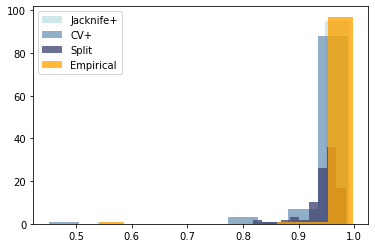

In [16]:
# plt.axvline(x = np.mean(mean_coverage_by_trial['True Probability']),
#                     color = '#33a02c',
#                     lw = 2,
#                     linestyle = '--',
#                     label = 'True Probability')
for i in range(len(mean_coverage_by_trial.columns)):
    plt.hist(mean_coverage_by_trial.iloc[:,i],
             alpha = 0.78,
             color = cmap[i],
             label = mean_coverage_by_trial.columns[i] )

plt.legend(loc = 'upper left')
plt.savefig(dataset + filler + 'Threshold_type_' + str(threshold_type) + filler2 + \
                            muh_fun +  '/plots/JAWS_mean_results_' + dataset +'.png')

#Image(dataset + filler + 'Threshold_type_' + threshold_type + '/' + muh_fun + '/plots/JAWS_mean_results_' + dataset + '.png', width = 600, height = 700)

### Baseline - GPR

In [17]:
# np.random.seed(98765) 

# X_train, Y_train, X_test, Y_test = generate_data_for_trials(ntrial, n_train, n_total, \
#                                                     eval('X_' + dataset), eval('Y_' + dataset), bias)

In [18]:
# kernel = 1.0 * RBF(length_scale = 1.0, length_scale_bounds = (1e-2, 1e3))
# gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 10)

In [19]:
# for i in tqdm.tqdm(range(ntrial)):
    
#     #Get data for ith trial
#     X_train_trial = X_train[i]
#     Y_train_trial = Y_train[i]
#     X_test_trial = X_test[i]
    
#     #Standardize data
#     scaler_X = StandardScaler()
#     scaler_y = StandardScaler()
    
#     X_train_scaled = scaler_X.fit_transform(X_train_trial)
#     Y_train_scaled = scaler_y.fit_transform(Y_train_trial.reshape(-1, 1)).ravel()
    
#     y_scale_factor = scaler_y.scale_
#     y_mean = scaler_y.mean_
    
#     #Fit to training data
#     gp.fit(X_train_scaled, Y_train_scaled)
    
#     # Make predictions on new data points
#     X_test_scaled = scaler_X.fit_transform(X_test_trial)
#     Y_pred_scaled, sigma_scaled = gp.predict(X_test_scaled, return_std = True)
    
#     #Rescale predictions
#     Y_pred = Y_pred_scaled * y_scale_factor + y_mean
#     sigma = sigma_scaled * y_scale_factor

#     pd.DataFrame(Y_pred).to_csv(dataset + '/GPR/y_pred_' + str(int(i)) + '.csv', index = False)
#     pd.DataFrame(sigma).to_csv(dataset + '/GPR/sigma_pred_' + str(int(i)) + '.csv', index = False)

In [20]:
# sigma_pred_by_trial = []
# Y_pred_by_trial = []

# for i in range(ntrial):
    
#     sigma_pred_by_trial.append(pd.read_csv(dataset + '/GPR/sigma_pred_' + str(int(i)) + '.csv')['0'].values)
#     Y_pred_by_trial.append(pd.read_csv(dataset + '/GPR/Y_pred_' + str(int(i)) + '.csv')['0'].values)

# pd.DataFrame(sigma_pred_by_trial).to_csv(dataset + '/GPR_' + str(ntrial) + 'Trial_' + 'Sigmas.csv', index = False)
# pd.DataFrame(Y_pred_by_trial).to_csv(dataset + '/GPR_' + str(ntrial) + 'Trial_' + 'Preds.csv', index = False)

In [21]:
sigma_pred_by_trial = pd.read_csv(dataset + '/GPR_' + str(ntrial) + 'Trial_' + 'Sigmas.csv')
GPR_mean_prob = np.mean(2*norm.cdf(tau/sigma_pred_by_trial)-1, axis = 1)
GPR_mean_prob = pd.DataFrame(GPR_mean_prob).rename(columns = {0:'value'})
GPR_mean_prob['model'] = 'GPR'
GPR_mean_prob['Legend'] = ''

In [22]:
def coverage_by_model(dataset, filler, filler2, cp_types, threshold_type, model, model_names, cmap):
    
    mean_coverage_by_model = []
    
    for i in range(len(model)):
        mean_coverage_by_model.append(pd.read_csv(dataset + filler + 'Threshold_type_' + str(threshold_type) \
                                  + filler2 + str(model[i]) + '/JAWS_coverage_by_trial/mean_coverage.csv'))
        mean_coverage_by_model[i]['model'] = np.repeat(model_names[i], 100)

    mean_coverage_by_model_transform = pd.melt(pd.concat([mean_coverage_by_model[0], 
                                                          mean_coverage_by_model[1], 
                                                          mean_coverage_by_model[2], 
                                                          mean_coverage_by_model[3]]),
                                                id_vars = ['model'],
                                                value_vars = cp_types, 
                                                var_name = 'Legend')
    
#     mean_coverage_total = pd.concat([mean_coverage_by_model_transform, GPR_mean_prob])
    
    plt.figure(figsize = (12,6))
    
    sns.boxplot(x = 'model',
                y = 'value',
                data = mean_coverage_by_model_transform,
                hue = 'Legend',
                palette = cmap,
                showmeans = True,
                meanprops = {"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

    
    plt.legend(loc = 'upper left')
    plt.ylabel('Coverage')
    plt.ylim(0.6,1.0)
    plt.xlabel('Model')
    plt.title('Coverage estimate distribution by  model')
    
    for i in range(len(model)):
        plt.savefig(dataset +  filler + 'Threshold_type_' + str(threshold_type) + '/' + \
                           filler2 + model[i] + '/plots/coverage_estimates_by_model_' + dataset +'.png')
    #plt.clf()
    
    return None

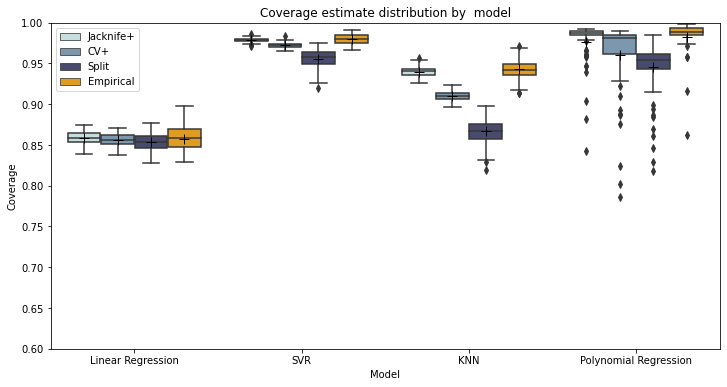

In [23]:
coverage_by_model(dataset, filler, filler2, cp_types, threshold_type, muh_fun_range, models, cmap)